
# Project 1: Delivery Time Prediction

#1. Data Preprocessing:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the Delivery Time dataset
data = pd.read_csv("E:\delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
##calling the read data function
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None


In [7]:
##preprocessing and feature engineering 
data_copy = data.copy()
print(data_copy)


    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


#2. Exploratory Data Analysis (EDA)

In [8]:
data_copy['Delivery Time'].value_counts()


Delivery Time
21.00    1
10.75    1
17.83    1
8.00     1
18.11    1
13.75    1
14.88    1
12.03    1
11.50    1
16.68    1
19.83    1
13.50    1
18.75    1
17.90    1
9.50     1
19.00    1
15.35    1
29.00    1
24.00    1
19.75    1
21.50    1
Name: count, dtype: int64

In [9]:
data_copy['Sorting Time'].value_counts()

Sorting Time
7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: count, dtype: int64

<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

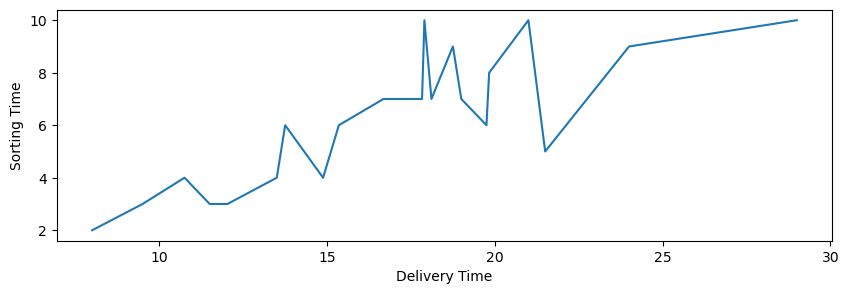

In [10]:
plt.figure(figsize=(10,3))
sns.lineplot(x='Delivery Time',y='Sorting Time',data=data_copy)

In [ ]:
#inference - there is increament in delivery time

C:\Users\ACER\AppData\Local\Temp\ipykernel_4252\56860630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data_copy["Delivery Time"])


0.3523900822831107
count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64


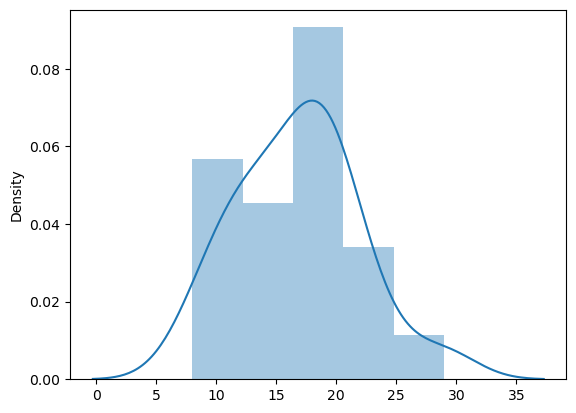

In [11]:
# Analyze the distribution of Delivery Time
sns.distplot(x=data_copy["Delivery Time"])
print(data_copy['Delivery Time'].skew())
print(data_copy['Delivery Time'].describe())

<Axes: xlabel='Delivery Time'>

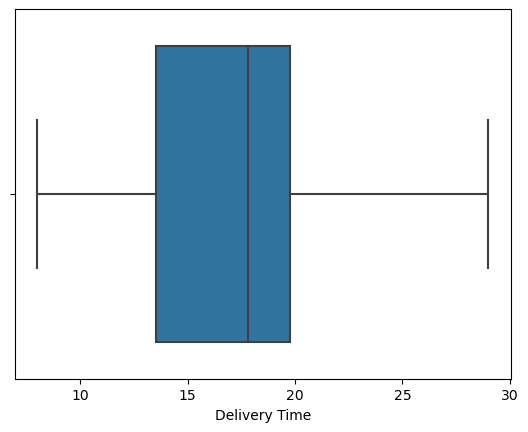

In [12]:
# Analyze the distribution of Delivery Time
sns.boxplot(x=data_copy["Delivery Time"])

C:\Users\ACER\AppData\Local\Temp\ipykernel_4252\149920950.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy["Sorting Time"])


<Axes: xlabel='Sorting Time', ylabel='Density'>

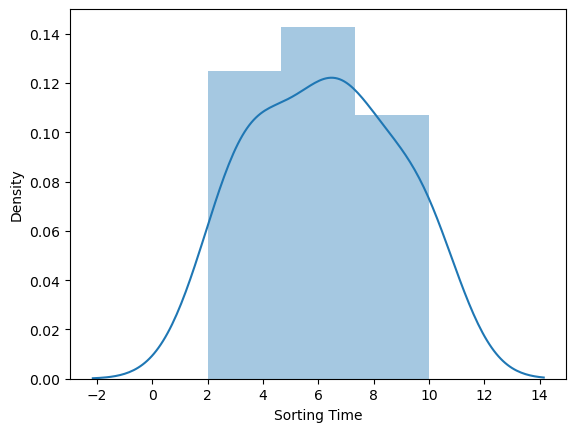

In [13]:
# Analyze the distribution of Sorting Time
sns.distplot(data_copy["Sorting Time"])

In [ ]:
#Inference - delivery time is distributed normally

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

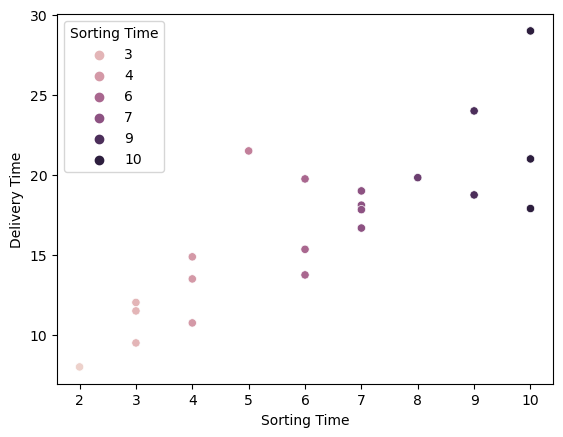

In [14]:
# Visualize the relationship between Delivery Time and Sorting Time
sns.scatterplot(x="Sorting Time", y="Delivery Time",hue='Sorting Time',data=data_copy)


#3. Model Building:

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Split the data into training and testing sets
X = data[["Sorting Time"]]
y = data["Delivery Time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train a simple linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
# Evaluate the model
print("R-squared:", model.score(X_test, y_test))

R-squared: -1.0207599586367362


#4. Model Interpretation:

Intercept: 4.682297962052008
Slope: 2.024244553759662


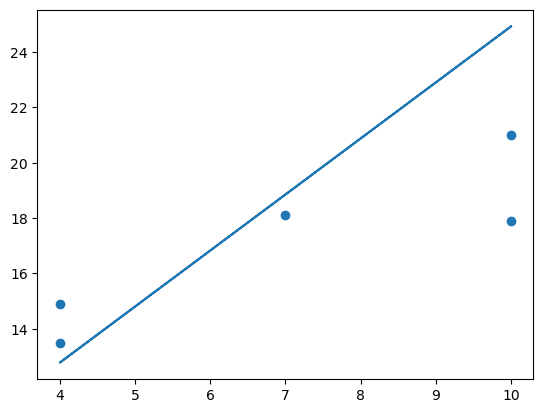

In [19]:
# Analyze the model coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Visualize the fitted regression line
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test))



In [27]:
#5.Saving the model using joblib

In [26]:
import joblib

In [27]:
# Import joblib library
from joblib import dump

# Save the model
dump(model, 'delivery_time_model.joblib')


['delivery_time_model.joblib']

In [28]:
#6.loading the model 
loaded_model = joblib.load('delivery_time_model.joblib')
print(loaded_model)

LinearRegression()
